In [1]:
'''
ULTIMATE QUESTION:
What is the best way to predict housing prices?


THIS NOTEBOOK'S QUESTION:
Can we get a data set that may help us predict housing prices, of an appropriate size and quality?

This notebook should only be run once at the start of the project to get the raw data
'''

"\nULTIMATE QUESTION:\nWhat is the best way to predict housing prices?\n\n\nTHIS NOTEBOOK'S QUESTION:\nCan we get a data set that may help us predict housing prices, of an appropriate size and quality?\n\nThis notebook should only be run once at the start of the project to get the raw data\n"

In [2]:
import os # need this for navigating through directories
import tarfile #need this for compression files
from six.moves import urllib

DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
PROJECT_FILE_PATH = os.path.join("datasets", "housing")
  
if not os.path.isdir(PROJECT_FILE_PATH):
    os.makedirs(PROJECT_FILE_PATH)
    print("couldn't find folder structure, but don't worry because I made it myself")

tgz_path = os.path.join(PROJECT_FILE_PATH, "housing.tgz")
urllib.request.urlretrieve(DOWNLOAD_URL,tgz_path)

housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=PROJECT_FILE_PATH)
housing_tgz.close()
print("data fetched")


data fetched


In [3]:
# If the above data was fetched and downloaded to a CSV, I want to see proof

import pandas #required to convert into a DataFrame

csv_path = os.path.join(PROJECT_FILE_PATH, "housing.csv")
print(f"csv_path: {csv_path}\n") #take note that linebreak has to be inside the quotes, not after

initial_housing_dataframe = pandas.read_csv(csv_path)
initial_housing_dataframe.head() #this will give us a demonstration of the data

csv_path: datasets\housing\housing.csv



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
initial_housing_dataframe.info() #this will give us metadata about the first DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
initial_housing_dataframe.describe() # describing dimensions through basic statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


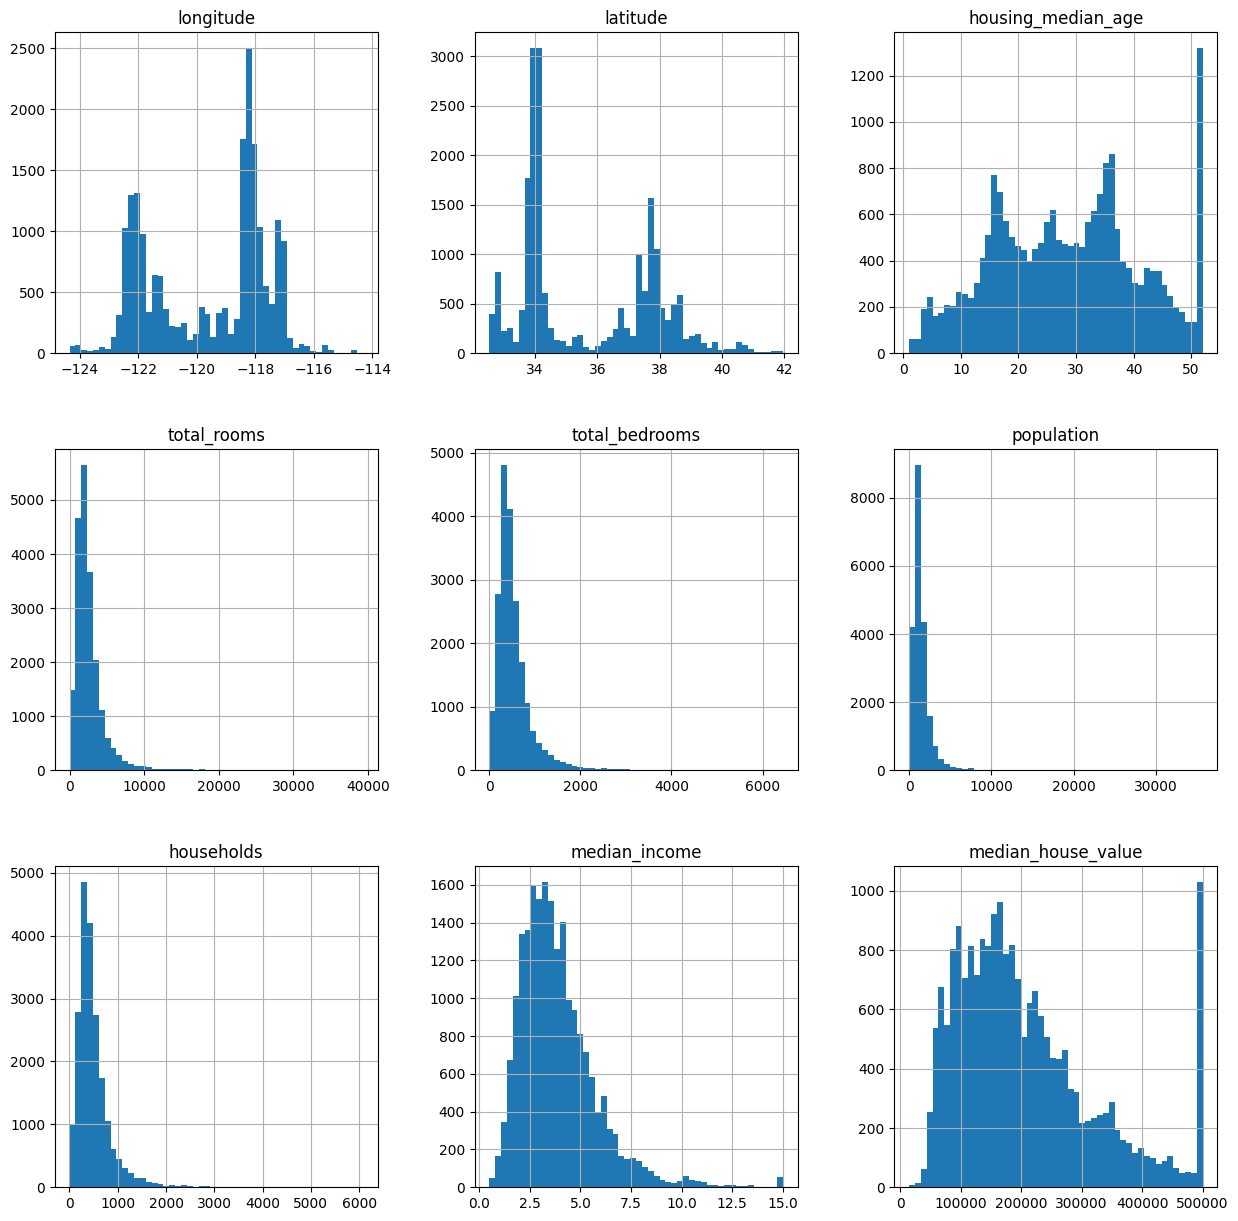

In [10]:
#we used INLINE, which produces flat non-responsive graphs to match the textbook, but "widgets" would make it interactive
%matplotlib inline

import matplotlib.pyplot as plt

# hist is coming from pandas, not plt. This function CREATES but does not DISPLAY the charts
initial_housing_dataframe.hist(bins=50, figsize=(15, 15))

#this is using matplotlib to DISPLAY the charts created by *Pandas*
plt.show()

In [12]:
'''
1. No thousands separators added automatically
2. housing age capped, median income too
3. median income expressed as multiples of $10,000, so +15.0 really means +150,000
'''

'\n1. No thousands separators added automatically\n2. median income expressed as multiples of $10,000, so +15.0 really means +150,000\n'